In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
 
# Opening JSON file
f = open('data/dev-v2.0.json')
f_train = open('data/train-v2.0.json')

# returns JSON object as
# a dictionary
data = json.load(f)
data_train = json.load(f_train)


# Closing file
f.close()
f_train.close()


### Compare Dev answers to the model predictions and conduct subsquent error analysis

In [8]:
# data['data']

In [13]:
# get all questions in qas
qas = []
titles = []
for article in data['data']:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            qas.append(qa)
            titles.append(article['title'])

#convert to dataframe
qas_df = pd.DataFrame(qas)
qas_df['title'] = titles
qas_df.head()

#split the list in the answers column into multiple columns
answers_df = qas_df['answers'].apply(pd.Series)
answers_df.columns = ['answer_start_1', 'text_1', 'answer_start_2', 'text_2', 'answer_start_3', 'text_3']
answers_df.drop(columns=['answer_start_2', 'text_2', 'answer_start_3', 'text_3'], inplace=True)
answers_df.head()

answers_df.drop(columns=['answer_start_1'], inplace=True)
answers_df.head()
# # split the dictionary in text_1 column into multiple columns
text_1_df = answers_df['text_1'].apply(pd.Series)
text_1_df.columns = ['ans_text', 'ans_start', 'end']
text_1_df.drop(columns=['end'], inplace=True)
text_1_df.head()

# # merge the two dataframes
qas_df = pd.concat([qas_df, text_1_df], axis=1)
qas_df.drop(columns=['answers'], inplace=True)
qas_df.head(3)





,question,id,is_impossible,plausible_answers,title,ans_text,ans_start
0,In what country is Normandy located?,56ddde6b9a695914005b9628,False,NaN,Normans,France,159.0
1,When were the Normans in Normandy?,56ddde6b9a695914005b9629,False,NaN,Normans,in the 10th and 11th centuries,87.0
2,From which countries did the Norse originate?,56ddde6b9a695914005b962a,False,NaN,Normans,"Denmark, Iceland and Norway",256.0


In [14]:
# qas_df.to_csv('qas_df_updated.csv')

In [ ]:
# # process train data

# df_train = pd.read_json("data/train-v2.0.json")
# df_train = df_train['data']

# #create a pandas dataframe
# df_train = pd.DataFrame(df_train)

# # separate out the title and paragraphs
# df_train['title'] = df_train['data'].apply(lambda x: x['title'])
# df_train['paragraphs'] = df_train['data'].apply(lambda x: x['paragraphs'])
# df_train = df_train.drop('data', axis=1)

# #seperate out the context and qas, id
# df_train['context'] = df_train['paragraphs'].apply(lambda x: x[0]['context'])
# df_train['qas'] = df_train['paragraphs'].apply(lambda x: x[0]['qas'])
# df_train = df_train.drop('paragraphs', axis=1)
# df_train = df_train.drop('title', axis=1)


# # separate out the question, answers, and id
# df_train['question'] = df_train['qas'].apply(lambda x: x[0]['question'])
# df_train['answers'] = df_train['qas'].apply(lambda x: x[0]['answers'])
# df_train['id'] = df_train['qas'].apply(lambda x: x[0]['id'])
# df_train = df_train.drop('qas', axis=1)
# df_train.head(1)['answers'][0][0]['text']

# df_train.head(1)['answers'][0][0]

# # separate out the answer text, start and end positions for the answer
# df_train['id'].nunique()

# #count the number of answers per question
# df_train['answer_count'] = df_train['answers'].apply(lambda x: len(x))
# df_train['answer_count'].value_counts()


# # move 'id' to the front of the dataframe
# cols = df_train.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# df_train = df_train[cols]

In [15]:
# open target pooler model score results

# Opening JSON file
f_target_20 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_20.json')
f_target_40 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_40.json')
f_target_60 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_60.json')
f_target_80 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_80.json')
f_target_100 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_01.json')
f_target_2 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_02.json')
f_target_3 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_03.json')
f_target_4 = open('results/scoring_dicts/old/scoring_dict_target_pooler_epochs_04.json')
f_bert_20 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_20.json')
f_bert_40 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_40.json')
f_bert_60 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_60.json')
f_bert_80 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_80.json')
f_bert_100 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_squadv2_epoch01.json')
f_bert_2 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_squadv2_epoch02.json')
f_bert_3 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_squadv2_epoch03.json')
f_bert_4 = open('results/scoring_dicts/old/scoring_dict_bert_large_uncased_squadv2_epoch04.json')


# returns JSON object as a dictionary
data_target_20 = json.load(f_target_20)
data_target_40 = json.load(f_target_40)
data_target_60 = json.load(f_target_60)
data_target_80 = json.load(f_target_80)
data_target_100 = json.load(f_target_100)
data_target_2 = json.load(f_target_2)
data_target_3 = json.load(f_target_3)
data_target_4 = json.load(f_target_4)
data_bert_20 = json.load(f_bert_20)
data_bert_40 = json.load(f_bert_40)
data_bert_60 = json.load(f_bert_60)
data_bert_80 = json.load(f_bert_80)
data_bert_100 = json.load(f_bert_100)
data_bert_2 = json.load(f_bert_2)
data_bert_3 = json.load(f_bert_3)
data_bert_4 = json.load(f_bert_4)


# Closing file
f_target_20.close()
f_target_40.close()
f_target_60.close()
f_target_80.close()
f_target_100.close()
f_target_2.close()
f_target_3.close()
f_target_4.close()
f_bert_20.close()
f_bert_40.close()
f_bert_60.close()
f_bert_80.close()
f_bert_100.close()
f_bert_2.close()
f_bert_3.close()
f_bert_4.close()

In [16]:
# convert to dataframe
df_target_20 = pd.DataFrame(data_target_20.items(), columns=['id', 'target_20_predict'])
df_target_40 = pd.DataFrame(data_target_40.items(), columns=['id', 'target_40_predict'])
df_target_60 = pd.DataFrame(data_target_60.items(), columns=['id', 'target_60_predict'])
df_target_80 = pd.DataFrame(data_target_80.items(), columns=['id', 'target_80_predict'])
df_target_100 = pd.DataFrame(data_target_100.items(), columns=['id', 'target_100_predict'])
df_target_2 = pd.DataFrame(data_target_2.items(), columns=['id', 'target_2_predict'])
df_target_3 = pd.DataFrame(data_target_3.items(), columns=['id', 'target_3_predict'])
df_target_4 = pd.DataFrame(data_target_4.items(), columns=['id', 'target_4_predict'])
df_bert_20 = pd.DataFrame(data_bert_20.items(), columns=['id', 'bert_20_predict'])
df_bert_40 = pd.DataFrame(data_bert_40.items(), columns=['id', 'bert_40_predict'])
df_bert_60 = pd.DataFrame(data_bert_60.items(), columns=['id', 'bert_60_predict'])
df_bert_80 = pd.DataFrame(data_bert_80.items(), columns=['id', 'bert_80_predict'])
df_bert_100 = pd.DataFrame(data_bert_100.items(), columns=['id', 'bert_100_predict'])
df_bert_2 = pd.DataFrame(data_bert_2.items(), columns=['id', 'bert_2_predict'])
df_bert_3 = pd.DataFrame(data_bert_3.items(), columns=['id', 'bert_3_predict'])
df_bert_4 = pd.DataFrame(data_bert_4.items(), columns=['id', 'bert_4_predict'])

# merge all dataframes
df_target = pd.merge(df_target_20, df_target_40, on='id')
df_target = pd.merge(df_target, df_target_60, on='id')
df_target = pd.merge(df_target, df_target_80, on='id')
df_target = pd.merge(df_target, df_target_100, on='id')
df_target = pd.merge(df_target, df_target_2, on='id')
df_target = pd.merge(df_target, df_target_3, on='id')
df_target = pd.merge(df_target, df_target_4, on='id')
df_target_df_bert = pd.merge(df_target, df_bert_20, on='id')
df_target_df_bert = pd.merge(df_target_df_bert, df_bert_40, on='id')
df_target_df_bert = pd.merge(df_target_df_bert, df_bert_60, on='id')
df_target_df_bert = pd.merge(df_target_df_bert, df_bert_80, on='id')
df_target_df_bert = pd.merge(df_target_df_bert, df_bert_100, on='id')
df_target_df_bert = pd.merge(df_target_df_bert, df_bert_2, on='id')
df_target_df_bert = pd.merge(df_target_df_bert, df_bert_3, on='id')

df_target_df_bert.head()



,id,target_20_predict,target_40_predict,target_60_predict,target_80_predict,target_100_predict,target_2_predict,target_3_predict,target_4_predict,bert_20_predict,bert_40_predict,bert_60_predict,bert_80_predict,bert_100_predict,bert_2_predict,bert_3_predict
0,56de148dcffd8e1900b4b5bc,,,,,,,,,,,robert guiscard,,,robert guiscard,
1,56de148dcffd8e1900b4b5bd,,,1082,1082,february 1082,february 1082,february 1082,february 1082,,,february 1082,february 1082,february 1082,february 1082,1082
2,56de148dcffd8e1900b4b5be,,,,,,,,,,,"30 , 000",,,,
3,5725f2c838643c19005aceed,,,,,,,,,,,,,,,
4,5725f2c838643c19005aceee,,,,,,,,,,,,,,,


In [17]:
# save to csv

# df_target_df_bert.to_csv('df_target_df_bert.csv')

### Extract Learned Pooler Weights

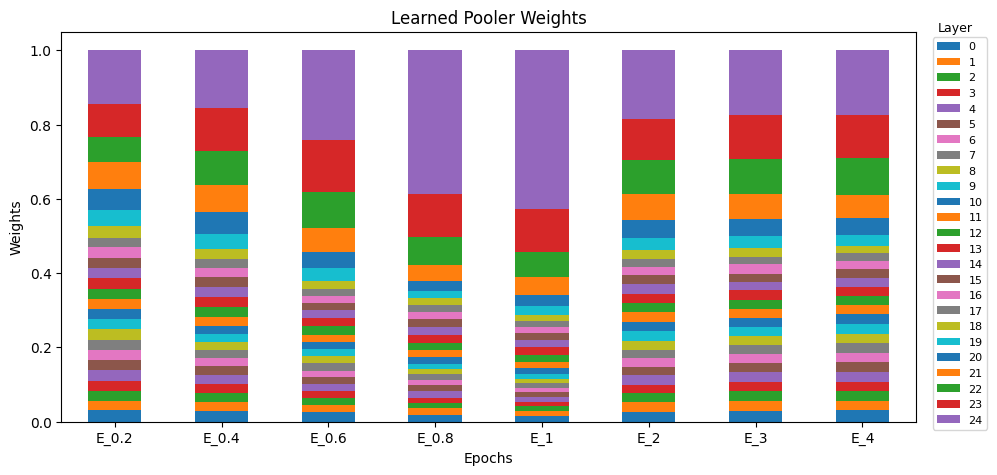

In [3]:
#open json file
dicts = json.load(open("./learned_pooler_weights.json", "r"))

dicts_2 = {}

for i, w in dicts.items():
    # print(f"\nModel {i}")
    softmax_w = np.exp(w) / np.sum(np.exp(w), axis=0)
    for ind, weight in enumerate(softmax_w):
        # print(f"layer: {ind}, weight: {weight:.4f}")
        if ind not in dicts_2:
            dicts_2[ind] = []
        dicts_2[ind].append(weight)


                

        # print(dicts_2)


# create a pandas dataframe
df = pd.DataFrame(dicts_2)
# rename the rows   
df = df.rename(index={0: 'E_0', 1: 'E_0.2', 2: 'E_0.4', 3: 'E_0.6', 4: 'E_0.8', 5: 'E_1', 6: 'E_2', 7: 'E_3', 8: 'E_4'})

# remove index = 0
df_1 = df.drop(['E_0'])
df_1

# plot the dataframe
import matplotlib.pyplot as plt
df_1.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Learned Pooler Weights')
# show x-axis label horizontally
plt.xticks(rotation=0)
plt.xlabel('Epochs')
plt.ylabel('Weights')
# show plot legend at the bottom of the plot
plt.legend(bbox_to_anchor=(1.09, 1.0), loc='upper right')
# # the size of legend 
# plt.rcParams['legend.fontsize'] = 'small'

# minimize the legend
plt.legend(bbox_to_anchor=(1.09, 1.0), loc='upper right', prop={'size': 8})

# reduce the gap between bars
plt.subplots_adjust(bottom=0.2)

# minimize the plot
plt.tight_layout()

# shrink the distance between each bar
plt.subplots_adjust(wspace=0.1)

# add a label on top of the legend
plt.text(0.96, 0.925, 'Layer', horizontalalignment='center', fontsize=9, transform = plt.gcf().transFigure)

plt.show()       



In [25]:
# save to csv   
df_1.to_csv('Full_Learned_weights_by_epoch.csv', index=False)

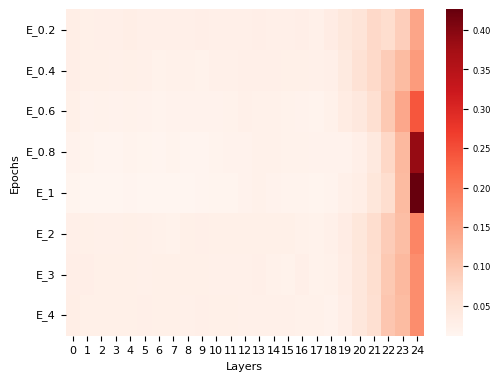

In [23]:
# seaborn heatmap for df_1

# sns.heatmap(df_1, annot=False, fmt=".2f", cmap="YlGnBu", cbar=False)

# change cmap to red and blue
# sns.heatmap(df_1, annot=False, fmt=".2f", cmap="RdBu", cbar=True)

# # change cmap from yellow and green to red and blue
# sns.heatmap(df_1, annot=False, fmt=".2f", cmap="RdBu", cbar=True)

# change cmap from light blue to dark blue
# sns.heatmap(df_1, annot=False, fmt=".2f", cmap="Blues", cbar=True)

# # change cmap from light green and deep dark green
# sns.heatmap(df_1, annot=False, fmt=".2f", cmap="Greens", cbar=True)

# change cmap from light red and deep dark red
# sns.heatmap(df_1, annot=False, fmt=".2f", cmap="Reds", cbar=True)
# #show x and y labels horizontally
# plt.yticks(rotation=0)
# plt.xticks(rotation=0)

# #reduce the size of x and y labels
# plt.yticks(fontsize=8)
# plt.xticks(fontsize=8)

# change the font size of the color bar labels
# use ax
ax = sns.heatmap(df_1, annot=False, fmt=".2f", cmap="Reds", cbar=True)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# show x and y lables horizontally and reduce the size of x and y labels
plt.yticks(rotation=0, fontsize=8)
plt.xticks(rotation=0, fontsize=8)
# add the x and y labels and set the font size
plt.xlabel("Layers", fontsize=8)
plt.ylabel("Epochs", fontsize=8)

# reduce the height of the heatmap
plt.subplots_adjust(bottom=0.2)

# reduce the distance between y values and x axis
plt.subplots_adjust(left=0.2)

plt.show()
